In [ ]:
!pip install transformers huggingface_hub diffusers gradio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [ ]:
# make sure you're logged in with `huggingface-cli login`
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/51 [00:00<?, ?it/s]

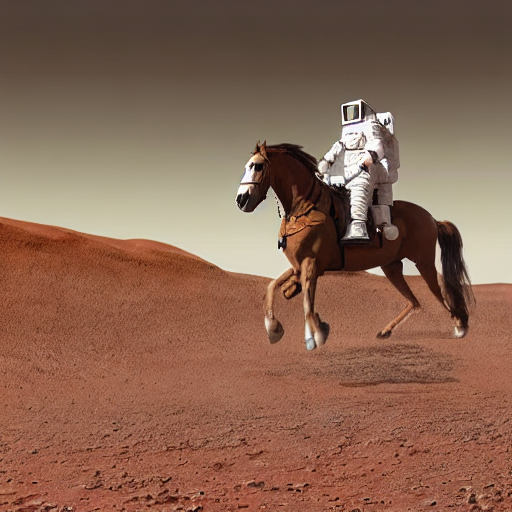

In [ ]:
image

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
images = []

for i in range (3):
  images.append(pipe(prompt).images[0])



  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
def show_img(images, nrows, ncolumns, ax=None):
    if not ax: fig, ax = plt.subplots(nrows, ncolumns)
    for im, a in zip(images, ax):
      a.imshow(im)
    plt.show()

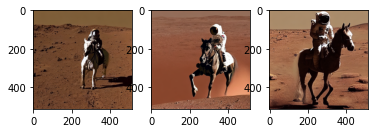

In [ ]:
show_img(images, 1, 3)

In [ ]:
images[0].size, images[1].size

((512, 512), (512, 512))

In [ ]:
import torch
device = "cuda"
generator = torch.Generator(device=device)

seed = 99
print(f"The seed for this generator is: {seed}")

The seed for this generator is: 99


In [ ]:
generator = generator.manual_seed(seed)
lat_1 = torch.randn((1,4,64,64), generator = generator, device=device)

generator = generator.manual_seed(seed)
lat_2 = torch.randn((1,4,64,64), generator = generator, device=device)

torch.equal(lat_1, lat_2)

True

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

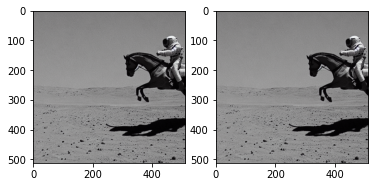

In [ ]:
lats = [lat_1, lat_2]
imgs=[]
for lat in lats:
  imgs.append(pipe(prompt, latents=lat).images[0])

show_img(imgs, 1, 2)

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

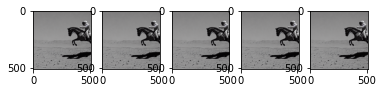

In [ ]:
steps = [5, 10, 25, 50, 100]

imgs=[]
for s in steps:
  imgs.append(pipe(prompt, latents=lat_1, num_inferencesteps=s).images[0])

show_img(imgs, 1, 5)

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

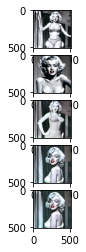

In [ ]:
prompts = ["Marilyn Monroe in House of the Dragon", 
           "Marilyn Monroe as Alicent Hightower in House of the Dragon", 
           "Marilyn Monroe as Alicent Hightower in House of the Dragon, green dress",
           "Marilyn Monroe as Alicent Hightower in House of the Dragon, green dress, ultra detailed",
           "Marilyn Monroe as Alicent Hightower in House of the Dragon, green dress, ultra detailed, cinematic"]

imgs = []
for p in prompts:
  imgs.append(pipe(p, latents=lat_1, num_inferencesteps=50).images[0])

show_img(imgs, 5, 1)

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

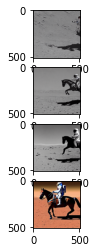

In [ ]:
scales = [3, 7, 12, 20]
imgs = []

for s in scales:
  imgs.append(pipe(prompt, latents=lat_1, num_inferencesteps=50, guidance_scale=s).images[0])

show_img(imgs, 4, 1)

In [ ]:
import requests
import base64
import os
import gradio as gr

def improve_image(img, rescale):
  return gr.processing_utils.decode_base64_to_image(
      requests.post(
          url = 'https://hf.space/embed/abidlabs/GFPGAN/+/api/predict',
          json = {
              "data": [gr.processing_utils.encode_pil_to_base64(img),
                       rescale]
          }
      ).json()['data'][0]
  )
  

  0%|          | 0/51 [00:00<?, ?it/s]

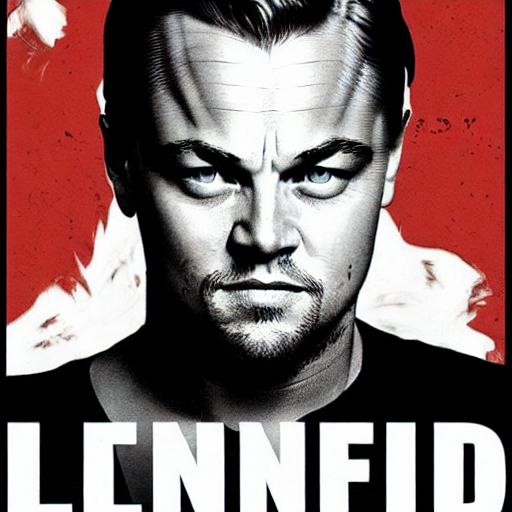

In [ ]:
prompt = "A movie poster of Leonardo Dicaprio in the Fight Club"

leo_img = pipe(prompt, latents=lat_1).images[0]
leo_img

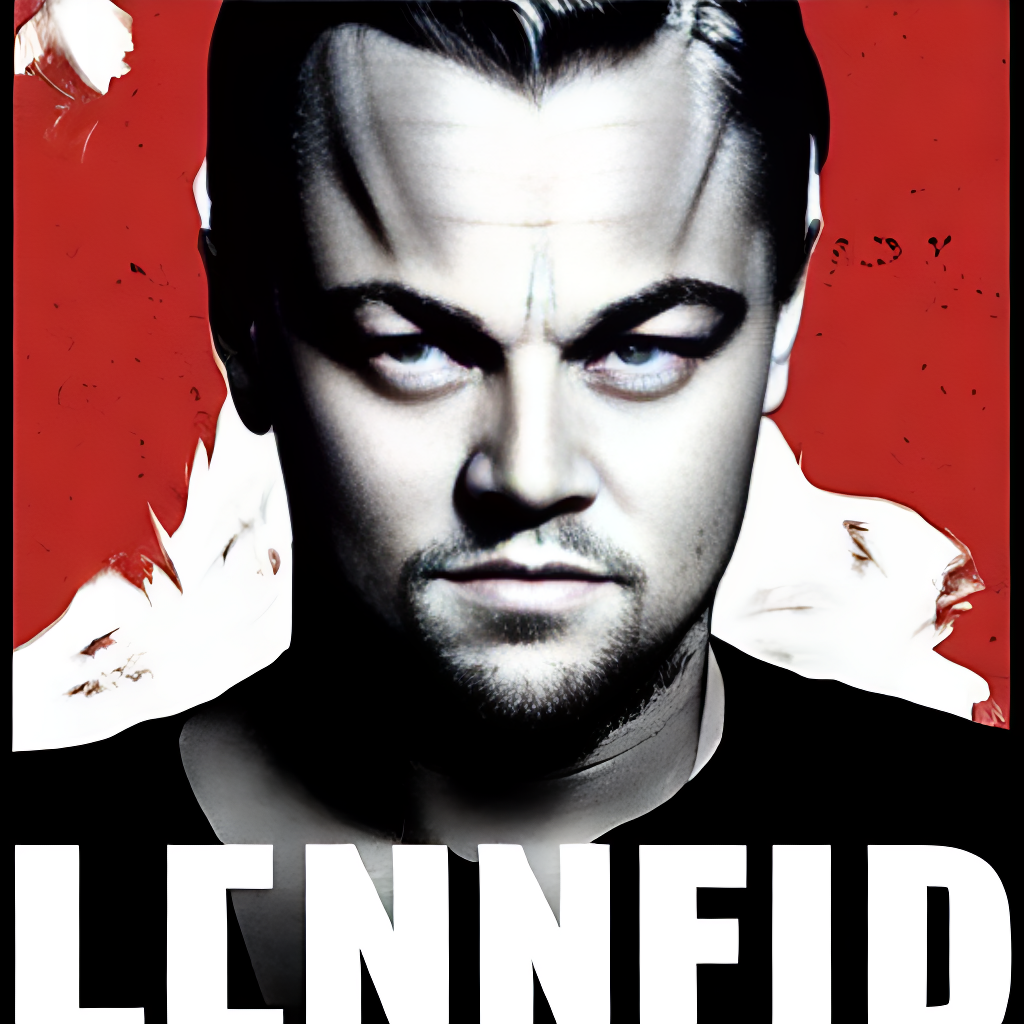

In [ ]:
leo_img_v2 = improve_image(leo_img, 2)
leo_img_v2

In [ ]:
import gradio as gr

def generate(celebrity, setting):
  prompt = f"A movie poster of {celebrity} in {setting}" 
  return pipe(prompt, latents=lat_1).images[0]

gr.Interface(
  fn = generate,
  inputs=[gr.Textbox(label='Celebrity'),
          gr.Dropdown(['House of the Dragon',
                       'Good will Hunting',
                       'About Love',
                       'Friends',
                       "That '70s Show"], label="Movie/Tv Show")],
  outputs = gr.Image(type='pil')   
).launch(debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/utils.py:64: UserWarning: unable to parse version details from package URL.
  warnings.warn("unable to parse version details from package URL.")


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://a2dbe37d2b51162b.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fcb2327c790>,
 'http://127.0.0.1:7860/',
 'https://a2dbe37d2b51162b.gradio.app')

In [ ]:
import gradio as gr

import os

HF_TOKEN = os.getenv('HF_TOKEN')
hf_writer = gr.HuggingFaceDatasetSaver(HF_TOKEN, "crowdsourced-movie-poster-demo")

gr.Interface(
  fn = generate,
  inputs=[gr.Textbox(label='Celebrity'),
          gr.Dropdown(['House of the Dragon',
                       'Good will Hunting',
                       'About Love',
                       'Friends',
                       "That '70s Show"], label="Movie/Tv Show")],
  outputs = gr.Image(type='pil'),
  allow_flagging = "manual",
  flagging_options=["Good Poster", "Not So Good Poster"],
  flagging_callback=hf_writer
).launch(debug=True)